# The dataset

Dataset yang digunakan merupakan data book-crossing yang terdiri dari tiga file dalam ekstensi CSV yaitu:
1. BX-Users.csv
2. BX-Books.csv
3. BX-Book-Ratings.csv

In [1]:
#Loading neccesary packages
import numpy as np          # linear algebra
import pandas as pd         # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

#Load dataset from bookcrossing
users = pd.read_csv("./BX-Users.csv", names=['UserID', 'Location', 'Age'], encoding='latin-1', skiprows=1)
books = pd.read_csv("./BX-Books.csv", names=['ISBN', 'Book_Title' ,'Book_Author','YearOfPublication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L'], encoding='latin-1', skiprows=1)
ratings = pd.read_csv("./BX-Book-Ratings.csv", names=['UserID', 'ISBN', 'Book_Rating'], encoding='latin-1', skiprows=1)

In [2]:
#Print users header
users.head()

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
#Print books header
books.head()

,ISBN,Book_Title,Book_Author,YearOfPublication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#Print ratings header
ratings.head()

,UserID,ISBN,Book_Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
#Print books info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271379 non-null  object
 1   Book_Title         271379 non-null  object
 2   Book_Author        271378 non-null  object
 3   YearOfPublication  271379 non-null  int64 
 4   Publisher          271377 non-null  object
 5   Image-Url-S        271379 non-null  object
 6   Image-Url-M        271379 non-null  object
 7   Image-Url-L        271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [6]:
#Print users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   UserID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
#Print ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   UserID       1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book_Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Data Preprocessing

In [8]:
#delete features that are not needed in books data
books.drop(['Image-Url-S','Image-Url-M','Image-Url-L'],axis=1,inplace=True)

In [9]:
#update all capital alphabet in dataset to lowercase and replace - with _ 
books.columns= books.columns.str.lower().str.replace('-', '_')
users.columns= users.columns.str.lower().str.replace('-', '_')
ratings.columns= ratings.columns.str.lower().str.replace('-', '_')

In [10]:
#check null value in books data
print(books.isnull().sum())

isbn                 0
book_title           0
book_author          1
yearofpublication    0
publisher            2
dtype: int64


## Checking missing value in dataset

In [11]:
#check null value of feature book_author in books data
books.loc[(books['book_author'].isnull()),:]

,isbn,book_title,book_author,yearofpublication,publisher
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [12]:
jumlah = users.isnull().sum().sort_values(ascending=False)
persentase = (users.isnull().sum()/users.isnull().count()).sort_values(ascending=False)
#check missing value in users
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [13]:
#check missing value in users based on Presentase missing data
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data
age,110762,39.719857


In [14]:
#print sum of missing value in users data
print('Data yang hilang atau missing data')
round(users.isnull().sum() / len(users) * 100, 4)

Data yang hilang atau missing data


userid       0.0000
location     0.0000
age         39.7199
dtype: float64

# Replace NaN value in dataset

In [15]:
#fill the missing value
books.loc[(books['publisher'].isnull()),'publisher'] = 'no mention'

In [16]:
#check null value of feature publisher in books data 
print(books['publisher'].isnull().sum())

0


In [17]:
#declare age = age value in users data
age = users['age']
#declare mean_age = mean of age in users data
mean_age = age.mean()

In [18]:
#print mean of age in users data
mean_age

34.75143370454978

In [19]:
#get round value mean of age in users data
round(mean_age)

35

In [20]:
#redeclare mean_age = round value mean of age in users data
mean_age = round(mean_age)

In [21]:
#fill missing value of age in users data with mean_age
age.fillna(value = mean_age, inplace = True)

In [22]:
#recheck missing value in users
jumlah = users.isnull().sum().sort_values(ascending=False)
persentase = (users.isnull().sum()/users.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [23]:
#recheck missing value in users based on Presentase missing data
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data


In [24]:
#reprint sum of missing value in users data
print('Data yang hilang atau missing data')
round(users.isnull().sum() / len(users) * 100, 4)

Data yang hilang atau missing data


userid      0.0
location    0.0
age         0.0
dtype: float64

In [25]:
#check mean of book_rating in books data
print('Rata-rata rating buku: ', round(ratings['book_rating'].mean()))

Rata-rata rating buku:  3


In [26]:
#check mean of book_rating in books data
print('Rata-rata rating buku: ', round(ratings['book_rating'].mean(), 5))

Rata-rata rating buku:  2.87991


# Prepare Dataset

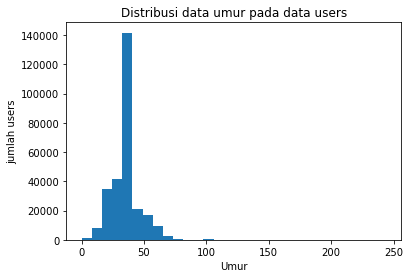

In [27]:
users.age.plot.hist(bins=30)
plt.title("Distribusi data umur pada data users")
plt.ylabel('jumlah users')
plt.xlabel('Umur');

In [28]:
#check how many rows and attributes of users data
users.shape

(278858, 3)

In [29]:
#check unique value of userid in users dataset
users['userid'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [30]:
#check unique value of age in users dataset
users['age'].unique()

array([ 35.,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  13.,
        58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,  40.,
        15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,  56.,
        67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64., 103.,
       104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,  11.,
        77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230., 239.,
        10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,  90.,
       123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97., 219.,
        86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162., 100.,
       156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199., 147.,
       168., 132., 159., 186., 152., 102., 116., 200., 115., 226., 137.,
       207., 229., 138., 109., 105., 228., 183., 20

In [31]:
#replace age >90 and age<5 in users data with nan 
users.loc[(users['age'] > 90) | (users['age'] < 5)] = np.nan
#fill nan value with mean of age
users['age'].fillna((users['age'].mean()), inplace=True)
users['age']= users['age'].astype('int64')
#Binning users into age groups using pandas.cut
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
users['age_group'] = pd.cut(users.age, range(0, 81, 10), right=False, labels=labels)
users[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,35,30-39
1,18,10-19
3,17,10-19
5,61,60-69
9,26,20-29
10,14,10-19
17,25,20-29
19,19,10-19
20,46,40-49
24,55,50-59


In [131]:
users['age_group'].unique()

[30-39, 10-19, 60-69, 20-29, 40-49, 50-59, 70-79, NaN, 0-9]
Categories (8, object): [0-9 < 10-19 < 20-29 < 30-39 < 40-49 < 50-59 < 60-69 < 70-79]

In [32]:
#check unique value of age in users dataset
users['age'].unique()

array([35, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 34, 23, 51, 31,
       21, 44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88], dtype=int64)

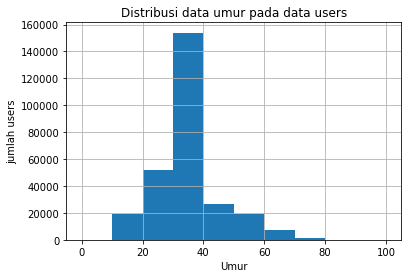

In [33]:
#create plot of age distribution
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Distribusi data umur pada data users')
plt.xlabel('Umur')
plt.ylabel('jumlah users')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

In [34]:
#check outliers of age value in users data
print('Jumlah outliers: ', sum(users['age'] > 100))

Jumlah outliers:  0


In [35]:
#check unique value of userid in users data
print('Jumlah pengguna: ',users['userid'].nunique())

Jumlah pengguna:  277546


In [36]:
#check unique value of isbn in books data
print('Jumlah buku: ', books['isbn'].nunique())

Jumlah buku:  271379


In [37]:
#select data ISBN in books and merge with ratings
unique_ratings = ratings[ratings.isbn.isin(books.isbn)]

In [38]:
#print value in unique_ratings data
unique_ratings.head()

,userid,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [39]:
#select data UserID in users and merge with ratings
rating_data = ratings[ratings.userid.isin(users.userid)]

In [40]:
#print value in rating_data 
rating_data.head()

,userid,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [41]:
#check how many rows and attributes
print(rating_data.shape)
print(unique_ratings.shape)
print(books.shape)
print(users.shape)

(1042218, 3)
(940674, 3)
(271379, 5)
(278858, 4)


In [42]:
#check unique value of book_rating
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

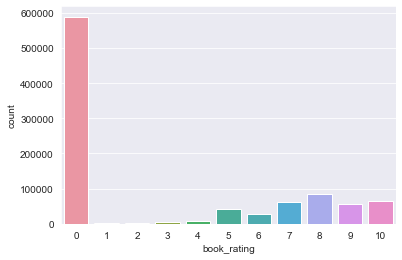

In [43]:
#create visualization of book_rating distribution
sns.set_style('darkgrid')
sns.countplot(data= unique_ratings , x='book_rating')
plt.show()

In [44]:
#feature engineering in book_rating with explicit and implicit value
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]

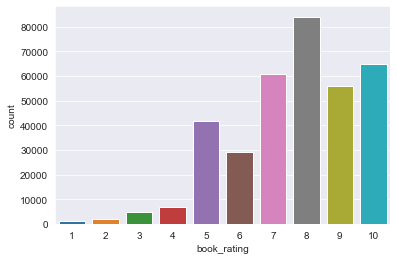

In [45]:
#create visualization ratings_explicit of book_rating distribution
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='book_rating')
plt.show()

In [46]:
#check ratings_explicit head of dataframe
ratings_explicit.head()

,userid,isbn,book_rating
1,276726,0155061224,5
3,276729,052165615X,3
4,276729,0521795028,6
8,276744,038550120X,7
16,276747,0060517794,9


In [47]:
#print how many row and attributes
print(unique_ratings.shape)
print(ratings_explicit.shape)

(940674, 3)
(351646, 3)


In [48]:
#merge users data with ratings explicit
#grouping age are merging in user_rating data
users_rating= pd.merge(users, ratings_explicit, on='userid', how='inner')
users_rating.head()

,userid,location,age,age_group,isbn,book_rating
0,8.0,"timmins, ontario, canada",35,30-39,0002005018,5
1,8.0,"timmins, ontario, canada",35,30-39,074322678X,5
2,8.0,"timmins, ontario, canada",35,30-39,0887841740,5
3,8.0,"timmins, ontario, canada",35,30-39,1552041778,5
4,8.0,"timmins, ontario, canada",35,30-39,1567407781,6


In [49]:
#merge users_rating with books data
data = pd.merge(users_rating, books, on='isbn', how='inner')

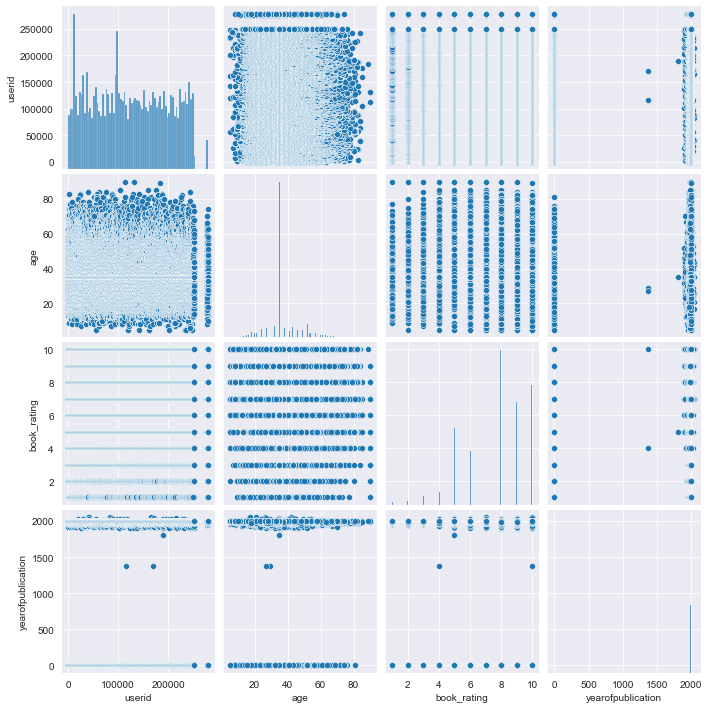

In [50]:
#get visualization of single variable in data and its relationship with the other variabel 
sns.pairplot(data)

In [51]:
#merge books data with rating 
new_book_df= pd.merge(books, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,yearofpublication,publisher,userid,book_rating
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676,8
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,67544,8
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,116866,9
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,123629,9


In [52]:
#merge new_book_df with users
new_book_df= pd.merge(new_book_df, users, on='userid')
new_book_df.head()

,isbn,book_title,book_author,yearofpublication,publisher,userid,book_rating,location,age,age_group
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,5,"timmins, ontario, canada",35,30-39
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,"timmins, ontario, canada",35,30-39
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,8,5,"timmins, ontario, canada",35,30-39
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,"timmins, ontario, canada",35,30-39
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,"timmins, ontario, canada",35,30-39


In [53]:
top_ten_books= pd.DataFrame(new_book_df.groupby('isbn')['book_rating'].count()
                         .sort_values(ascending=False).head(10))

print('The top ten books recommendation : ')
top_ten_books

The top ten books recommendation : 


,book_rating
isbn,
0316666343,630
0971880107,525
0385504209,448
0312195516,352
0060928336,290
059035342X,281
0142001740,281
0446672211,263
044023722X,258


In [54]:
new =pd.merge(top_ten_books, books, on='isbn')
new.head(15)

,isbn,book_rating,book_title,book_author,yearofpublication,publisher
0,0316666343,630,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
1,0971880107,525,Wild Animus,Rich Shapero,2004,Too Far
2,0385504209,448,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0312195516,352,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,0060928336,290,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
5,059035342X,281,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,Arthur A. Levine Books
6,0142001740,281,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
7,0446672211,263,Where the Heart Is (Oprah's Book Club (Paperba...,Billie Letts,1998,Warner Books
8,044023722X,258,A Painted House,John Grisham,2001,Dell Publishing Company
9,0452282152,254,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


Dari dataframe diatas maka sebagai penjual buku, dia dapat mempelajari buku yang paling banyak dibeli oleh konsumen. Dengan memanfaatkan informasi ini maka penjual buku dapat menghasilkan keputusan terkait penjualan bukunya.

Sebagai pembeli, dia dapat mengetahui tren dari sebuah buku yakni buku dengan judul "The Lovely Bonnes: A Novel" paling banyak diberi rating sehingga bisa menjadi rekomendasi ke pengguna apabila dia tertarik ataupun ingin mengetahui buku yang paling banyak diberi rating tersebut

## Feature Engineering

In [55]:
#define favorable book in term of book with rating>5
new_book_df["Favorable"] = new_book_df["book_rating"] > 5

In [56]:
#delete features that are not needed in new_book_df data
new_book_df.drop(['age','location','publisher','book_author','yearofpublication'],axis=1,inplace=True)
new_book_df.head()

,isbn,book_title,userid,book_rating,age_group,Favorable
0,0002005018,Clara Callan,8,5,30-39,False
1,074322678X,Where You'll Find Me: And Other Stories,8,5,30-39,False
2,0887841740,The Middle Stories,8,5,30-39,False
3,1552041778,Jane Doe,8,5,30-39,False
4,1567407781,The Witchfinder (Amos Walker Mystery Series),8,6,30-39,True


In [57]:
#check dataframe of new_book_df
new_book_df[1:15]

,isbn,book_title,userid,book_rating,age_group,Favorable
1,074322678X,Where You'll Find Me: And Other Stories,8,5,30-39,False
2,0887841740,The Middle Stories,8,5,30-39,False
3,1552041778,Jane Doe,8,5,30-39,False
4,1567407781,The Witchfinder (Amos Walker Mystery Series),8,6,30-39,True
5,1575663937,More Cunning Than Man: A Social History of Rat...,8,6,30-39,True
6,1881320189,Goodbye to the Buttermilk Sky,8,7,30-39,True
7,0002005018,Clara Callan,11676,8,30-39,True
8,0399135782,The Kitchen God's Wife,11676,9,30-39,True
9,0671870432,PLEADING GUILTY,11676,8,30-39,True
10,0440234743,The Testament,11676,9,30-39,True


In [58]:
#select data userid in new_book_df and get review from 200 first users
ratings = new_book_df[new_book_df['userid'].isin(range(200))]

In [59]:
#create dataset with favorable books
favorable_ratings = ratings[new_book_df["Favorable"]]

Temukan review yang bagus dari pengguna untuk itemset. Jadi, kita membutuhkan data buku dengan review yang bagus. Hal ini dapat dilakukan dengan mengelompokkan dataset berdasarkan User ID and melakukan iterasi berdasarkan buku di setiap kelompok

In [60]:
favorable_reviews_by_users = dict((k, frozenset(v.values))
                                 for k, v in favorable_ratings.groupby("userid")["isbn"])

In [61]:
#count sum of favorable book groupby isbn
num_favorable_by_book = new_book_df[["isbn", "age_group","Favorable"]].groupby("isbn").sum()

In [135]:
#check num_favorable_by_book value sort by Favorable
num_favorable_by_book.sort_values(by="Favorable", ascending=False).head()

,Favorable
isbn,
0316666343,591.0
0385504209,415.0
0312195516,315.0
059035342X,273.0
0142001740,268.0


## The Apriori Implementation/Market Basket Analysis

Langkah-langkah implementasi dari apriori pada sistem rekomendasi ini yaitu:
1. Membuat initial frequent itemset
2. Membuat candidate itemset menggunakan superset di frequent itemset yang tersedia
3. Uji candidate itemset untuk mengetahui bahwa candidat tersebut sudah frequent, Jika tidak candidat itemset akan dihapus
4. Melakukan pengecekan frequent itemset yang baru pada langkah 3
5. Mengembalikan semua frequent itemset yang telah ditemukan

In [63]:
#Define frequent_itemsets to access itemset 
frequent_itemsets = {}

In [64]:
#Define minimum support which needed for item so that an item can be considered frequency. 
#This value is selected based on the data set
min_support = 2

In [65]:
from collections import defaultdict

def find_frequent_itemsets(favorable_reviews_by_users, k_1_itemsets, min_support):
    counts = defaultdict(int)
    for user, reviews in favorable_reviews_by_users.items():
        for itemset in k_1_itemsets:
            if itemset.issubset(reviews):
                for other_reviewed_book in reviews - itemset:
                    current_superset = itemset | frozenset((other_reviewed_book,))
                    counts[current_superset] += 1
    return dict([(itemset, frequency) for itemset, frequency in counts.items() if frequency >= min_support])

In [66]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 20
frequent_itemsets[1] = dict((frozenset((isbn,)), row["Favorable"])
                                for isbn, row in num_favorable_by_book.iterrows()
                                if row["Favorable"] > min_support)

In [67]:
frequent_itemsets[1]

{frozenset({'000649840X'}): 34.0,
 frozenset({'0007110928'}): 21.0,
 frozenset({'0020199600'}): 21.0,
 frozenset({'0020442203'}): 26.0,
 frozenset({'002542730X'}): 63.0,
 frozenset({'0028604199'}): 28.0,
 frozenset({'006000438X'}): 29.0,
 frozenset({'0060008032'}): 25.0,
 frozenset({'0060085452'}): 22.0,
 frozenset({'0060096195'}): 49.0,
 frozenset({'0060168013'}): 22.0,
 frozenset({'006016848X'}): 36.0,
 frozenset({'0060173289'}): 44.0,
 frozenset({'0060175400'}): 66.0,
 frozenset({'0060175966'}): 30.0,
 frozenset({'0060188731'}): 37.0,
 frozenset({'006019491X'}): 37.0,
 frozenset({'0060198133'}): 26.0,
 frozenset({'0060199652'}): 51.0,
 frozenset({'0060248025'}): 26.0,
 frozenset({'0060256672'}): 25.0,
 frozenset({'0060391626'}): 66.0,
 frozenset({'0060392452'}): 124.0,
 frozenset({'0060502258'}): 137.0,
 frozenset({'0060512822'}): 27.0,
 frozenset({'0060517794'}): 26.0,
 frozenset({'0060809833'}): 22.0,
 frozenset({'0060914653'}): 25.0,
 frozenset({'0060915544'}): 106.0,
 frozenset(

In [68]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 2

# k=1 candidates are the isbn with more than min_support favourable reviews
frequent_itemsets[1] = dict((frozenset((isbn,)), row["Favorable"])
                                for isbn, row in num_favorable_by_book.iterrows()
                                if row["Favorable"] > min_support)

print("There are {} books with more than {} favorable reviews".format(len(frequent_itemsets[1]), min_support))
sys.stdout.flush()
for k in range(2, 20):
    # Generate candidates of length k, using the frequent itemsets of length k-1
    # Only store the frequent itemsets
    cur_frequent_itemsets = find_frequent_itemsets(favorable_reviews_by_users, frequent_itemsets[k-1],
                                                   min_support)
    if len(cur_frequent_itemsets) == 0:
        print("Did not find any frequent itemsets of length {}".format(k))
        sys.stdout.flush()
        break
    else:
        print("I found {} frequent itemsets of length {}".format(len(cur_frequent_itemsets), k))
        #print(cur_frequent_itemsets)
        sys.stdout.flush()
        frequent_itemsets[k] = cur_frequent_itemsets
# We aren't interested in the itemsets of length 1, so remove those
del frequent_itemsets[1]

There are 21229 books with more than 2 favorable reviews
I found 40 frequent itemsets of length 2
I found 46 frequent itemsets of length 3
I found 40 frequent itemsets of length 4
I found 22 frequent itemsets of length 5
I found 7 frequent itemsets of length 6
I found 1 frequent itemsets of length 7
Did not find any frequent itemsets of length 8


In [69]:
print("Found a total of {0} frequent itemsets".format(sum(len(itemsets) for itemsets in frequent_itemsets.values())))

Found a total of 156 frequent itemsets


## Extracting Asosiation Rules

In [70]:
candidate_rules = []
for itemset_length, itemset_counts in frequent_itemsets.items():
    for itemset in itemset_counts.keys():
        for conclusion in itemset:
            premise = itemset - set((conclusion,))
            candidate_rules.append((premise, conclusion))
            
print("There are {} candidate rules".format(len(candidate_rules)))

There are 537 candidate rules


In [71]:
print(candidate_rules[:5])

[(frozenset({'0891075275'}), '0425099148'), (frozenset({'0425099148'}), '0891075275'), (frozenset({'0446310786'}), '0449005615'), (frozenset({'0449005615'}), '0446310786'), (frozenset({'0553582909'}), '0671888587')]


In [72]:
# Now, we compute the confidence of each of these rules. This is very similar to what we did in chapter 1
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)
for user, reviews in favorable_reviews_by_users.items():
    for candidate_rule in candidate_rules:
        premise, conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
rule_confidence = {candidate_rule: correct_counts[candidate_rule] / float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule])
              for candidate_rule in candidate_rules}

In [170]:
# Choose only rules above a minimum confidence level
min_confidence = 0.9

In [171]:
# Filter out the rules with poor confidence
rule_confidence = {rule: confidence for rule, confidence in rule_confidence.items() if confidence > min_confidence}
print(len(rule_confidence))

537


In [172]:
from operator import itemgetter
sorted_confidence = sorted(rule_confidence.items(), key=itemgetter(1), reverse=True)

In [173]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    print("Rule: Jika seorang pengguna menyukai {0} mereka juga akan direkomendasikan {1}".format(premise, conclusion))
    print(" - Confidence: {0:.3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: Jika seorang pengguna menyukai frozenset({'0891075275'}) mereka juga akan direkomendasikan 0425099148
 - Confidence: 1.000

Rule #2
Rule: Jika seorang pengguna menyukai frozenset({'0425099148'}) mereka juga akan direkomendasikan 0891075275
 - Confidence: 1.000

Rule #3
Rule: Jika seorang pengguna menyukai frozenset({'0446310786'}) mereka juga akan direkomendasikan 0449005615
 - Confidence: 1.000

Rule #4
Rule: Jika seorang pengguna menyukai frozenset({'0449005615'}) mereka juga akan direkomendasikan 0446310786
 - Confidence: 1.000

Rule #5
Rule: Jika seorang pengguna menyukai frozenset({'0553582909'}) mereka juga akan direkomendasikan 0671888587
 - Confidence: 1.000



# Recommender System

In [77]:
new_book_df.head()

,isbn,book_title,userid,book_rating,age_group,Favorable
0,0002005018,Clara Callan,8,5,30-39,False
1,074322678X,Where You'll Find Me: And Other Stories,8,5,30-39,False
2,0887841740,The Middle Stories,8,5,30-39,False
3,1552041778,Jane Doe,8,5,30-39,False
4,1567407781,The Witchfinder (Amos Walker Mystery Series),8,6,30-39,True


Dari informasi dataframe diatas dapa diketahui bahwa buku dengan judul buku Clara Callan disarankan untuk pembeli dengan umur dalam rentang 30-39

In [152]:
def get_book_age(isbn):
    title_object = new_book_df[new_book_df["isbn"] == isbn]["age_group"]
    title = title_object.values[0]
    return title

In [153]:
def get_book_name(isbn):
    title_object = new_book_df[new_book_df["isbn"] == isbn]["book_title"]
    title = title_object.values[0]
    return title

In [175]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    (premise, conclusion) = sorted_confidence[index][0]
    premise_ages = ", ".join(get_book_age(idx) for idx in premise)
    premise_names = ", ".join(get_book_name(idx) for idx in premise)
    conclusion_name = get_book_name(conclusion)
    print("Rule: Jika seseorang  membeli buku {} maka pengguna tersebut juga akan direkomendasikan buku {}".format( premise_names, conclusion_name))
    print(" - Confidence: {0: .3f}".format(rule_confidence[(premise, conclusion)]))
    print("")

Rule #1
Rule: Jika seseorang  membeli buku Piercing the Darkness maka pengguna tersebut juga akan direkomendasikan buku Death in the Clouds
 - Confidence:  1.000

Rule #2
Rule: Jika seseorang  membeli buku Death in the Clouds maka pengguna tersebut juga akan direkomendasikan buku Piercing the Darkness
 - Confidence:  1.000

Rule #3
Rule: Jika seseorang  membeli buku To Kill a Mockingbird maka pengguna tersebut juga akan direkomendasikan buku Seabiscuit: An American Legend
 - Confidence:  1.000

Rule #4
Rule: Jika seseorang  membeli buku Seabiscuit: An American Legend maka pengguna tersebut juga akan direkomendasikan buku To Kill a Mockingbird
 - Confidence:  1.000

Rule #5
Rule: Jika seseorang  membeli buku Icebound maka pengguna tersebut juga akan direkomendasikan buku I'll Be Seeing You
 - Confidence:  1.000



Berdasarkan rule diatas maka sebagai penjual informasi ini dapat dimanfaatkan untuk membuat keputusan dengan apakah dengan menyesuaikan posisi rak buku berdasarkan buku yang memiliki keterkaitan sehingga apabila pembeli ingin membeli buku tersebut maka akan mudah untuk dilihat, memperbanyak stok buku tersebut atau hal lain yang disesuaikan dengan kebutuhan pasar.

In [158]:
new_book_df

,isbn,book_title,userid,book_rating,age_group,Favorable
0,0002005018,Clara Callan,8,5,30-39,False
1,074322678X,Where You'll Find Me: And Other Stories,8,5,30-39,False
2,0887841740,The Middle Stories,8,5,30-39,False
3,1552041778,Jane Doe,8,5,30-39,False
4,1567407781,The Witchfinder (Amos Walker Mystery Series),8,6,30-39,True
...,...,...,...,...,...,...
350082,1591021146,Why the Religious Right Is Wrong About Separat...,245366,8,40-49,True
350083,0152049266,The Window,245444,8,10-19,True
350084,0735605289,Managing and Maintaining Microsoft Exchange Se...,245451,7,30-39,True
350085,0393022366,Railroads,245503,10,40-49,True


## Evaluation

In [174]:
#Loading neccesary packages
import numpy as np          # linear algebra
import pandas as pd         # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')